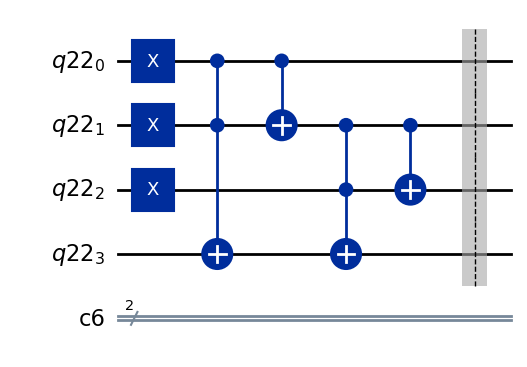

In [14]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(4)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[2])

# qc.cx(qr[0], qr[3])
# qc.cx(qr[1], qr[3])
# qc.cx(qr[2], qr[3])
# qc.ccx(qr[0], qr[1], qr[4])
# qc.ccx(qr[1], qr[2], qr[4])
# qc.ccx(qr[0], qr[2], qr[4])

qc.ccx(qr[0], qr[1], qr[3])
qc.cx(qr[0], qr[1])
qc.ccx(qr[1], qr[2], qr[3])
qc.cx(qr[1], qr[2])

qc.barrier()

# qc.measure([qr[2], qr[3]], cr)

qc.draw(output='mpl')

In [17]:
from qiskit.quantum_info import Statevector

sv = Statevector(qc)
sv.draw('latex')

<IPython.core.display.Latex object>

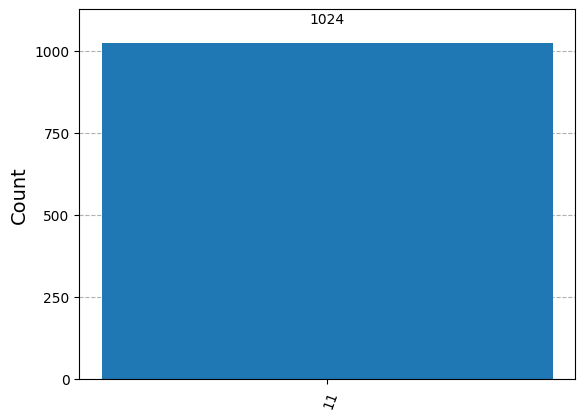

In [12]:
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
isa_circuit = transpile(qc, simulator)
result = simulator.run(isa_circuit).result()
counts = result.get_counts()
plot_histogram(counts)